### Importing
--- 

In [1]:
#Import libraries 
 
import scipy.stats as stats
import numpy as np
import pandas as pd

#sklearn
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, LassoCV, RidgeCV, ElasticNetCV, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# visual
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import datsets
df_train = pd.read_csv('data/train_new.csv')
df_test =  pd.read_csv('data/test_new.csv')

### EDA 
---


In [3]:
df_train.head()

,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,...,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,property_age,remodel_age,porch_sf
0,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,...,None,None,0,3,2010,WD,130500,34,5,1
1,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,...,None,None,0,4,2009,WD,220000,13,12,1
2,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,...,None,None,0,1,2010,WD,109000,57,3,1
3,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,...,None,None,0,4,2010,WD,174000,4,3,0
4,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,...,None,None,0,3,2010,WD,138500,110,17,1


In [4]:
corrVal = df_train.select_dtypes(exclude =[object]) #create corr values by remove object types

In [5]:
df_corr= corrVal.corr()

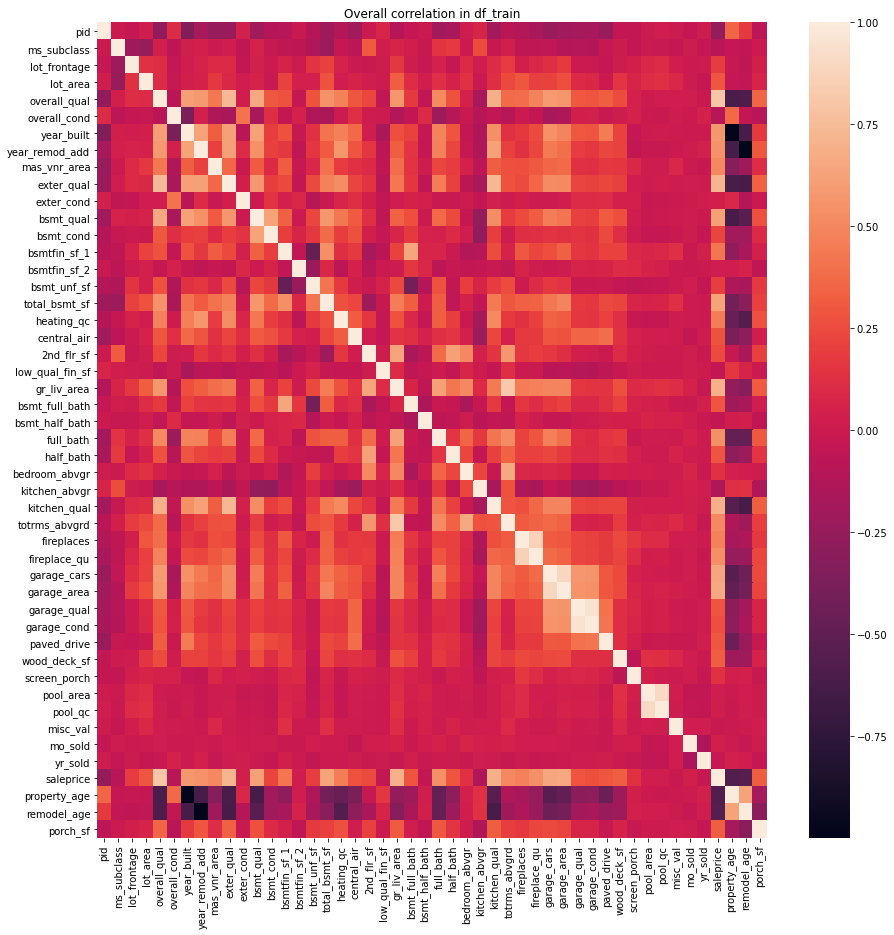

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df_corr);
plt.title('Overall correlation in df_train');

In the above heatmap, it shows there are a few columns that have very high collinearity
- garage_cond with garage_qual
- garage_cars with garage_area
- pool_qc vs pool_area
- year_built with year_remod_add 

In [7]:
garagecondVqual = pd.DataFrame()
garagecondVqual['garage_cond'] =df_train['garage_cond']
garagecondVqual['garage_qual']=df_train['garage_qual']
garagecondVqual.corr()
#As there are 95% correlated, i will choose drop garage_cond to drop

,garage_cond,garage_qual
garage_cond,1.000000,0.950493
garage_qual,0.950493,1.000000


In [8]:
poolqcVarea = pd.DataFrame()
poolqcVarea['garage_cars'] =df_train['garage_cars']
poolqcVarea['garage_area']=df_train['garage_area']
poolqcVarea.corr()
#As there are 89% correlated, i will choose drop garage_cond to drop

,garage_cars,garage_area
garage_cars,1.000000,0.893442
garage_area,0.893442,1.000000


In [9]:
poolqcVarea = pd.DataFrame()
poolqcVarea['pool_qc'] =df_train['pool_qc']
poolqcVarea['pool_area']=df_train['pool_area']
poolqcVarea.corr()
#As there are 90% correlated, i will choose drop garage_cond to drop

,pool_qc,pool_area
pool_qc,1.000000,0.904689
pool_area,0.904689,1.000000


In [10]:
yearbuiltVremod = pd.DataFrame()
yearbuiltVremod['year_built'] =df_train['year_built']
yearbuiltVremod['year_remod_add']=df_train['year_remod_add']
yearbuiltVremod.corr()


,year_built,year_remod_add
year_built,1.000000,0.629116
year_remod_add,0.629116,1.000000


In [11]:
len(df_train[df_train['year_built']== df_train['year_remod_add']])
#Although they are only only 62% correlated, there is more than 50% where year_remod_add == year_built. Will remove year_built

1101

In [12]:
#dropping all the identified columns including pid as it's also a serial number of property 

df_train = df_train.drop(columns=['garage_qual','garage_cars','fireplace_qu','pool_qc','pid', 'year_built'])

In [13]:
#a buyer would generally look at garage size and condition together instead of separate. create interaction for them 
df_train['garage_size_cond'] = df_train['garage_cond']* df_train['garage_area']
df_train= df_train.drop(columns=['garage_cond','garage_area'])

In [14]:
corr_sales =df_train.corr()[['saleprice']].sort_values('saleprice',ascending=False)
corr_sales
#filtering to those values correlated to salesprice only to see which coumns are highly correlated 

,saleprice
saleprice,1.000000
overall_qual,0.800207
exter_qual,0.712146
gr_liv_area,0.697038
kitchen_qual,0.692336
garage_size_cond,0.651459
total_bsmt_sf,0.629303
bsmt_qual,0.612188
year_remod_add,0.550370
full_bath,0.537969


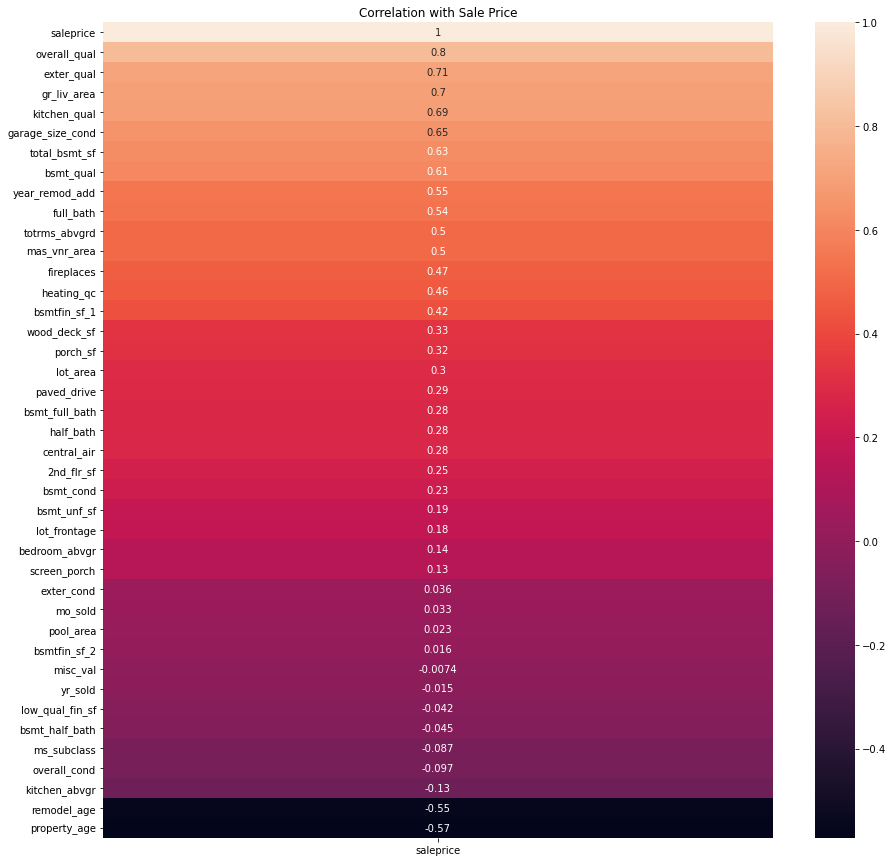

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_sales,annot = True);
plt.title('Correlation with Sale Price');

<Figure size 1080x2160 with 0 Axes>

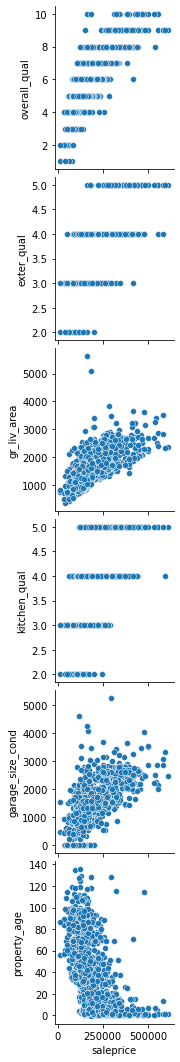

In [16]:
plt.figure(figsize=(15,30))
sns.pairplot(df_train, y_vars=['overall_qual','exter_qual', 'gr_liv_area', 'kitchen_qual','garage_size_cond','property_age'],
             x_vars=['saleprice']);
#filter to pairplot those which is top 5 positive corr and the most negative corr

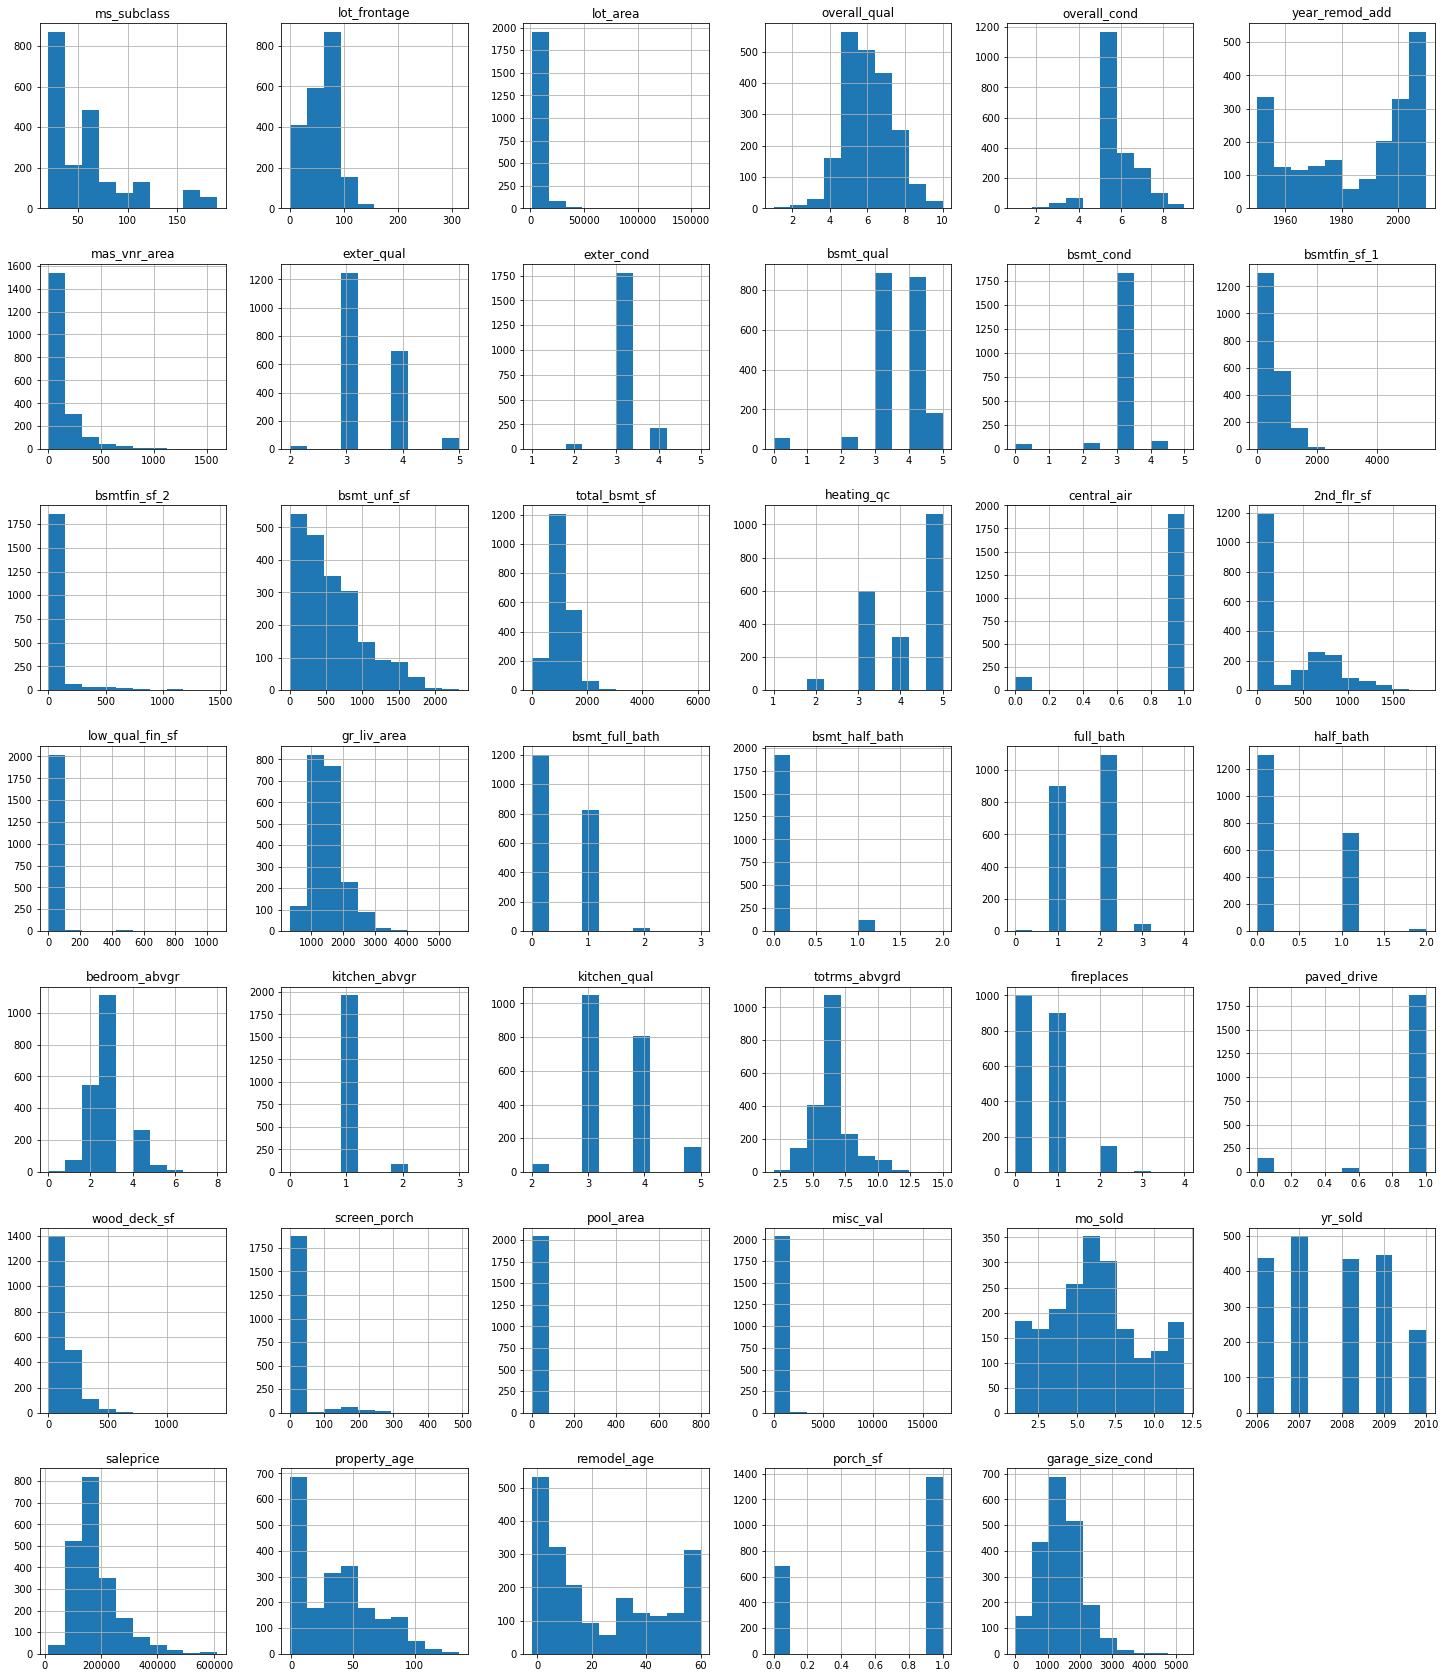

In [17]:
#to view if the datas are normally distributed?
df_train.hist(figsize=(25,30));
plt.tick_params(
                axis='both',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                left=False,
                right=False,
                labelbottom=False,  # labels along the bottom edge are off
                labelleft=False);
plt.title('Are the values normally distributed?');

Not all values are normally distributed. From the diagram, only overall_qual is. Will have to scale it later to normalize

***Boxplot to check outliers for sale price and top 5 corr*** 

In [18]:
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


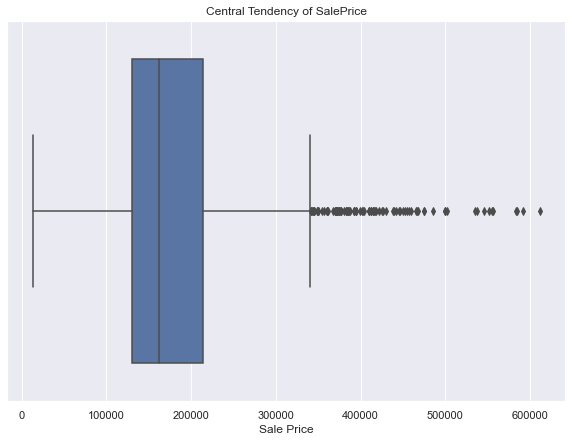

In [19]:
plt.figure(figsize=(10,7))
sns.set(font_scale=1)
sns.boxplot(df_train['saleprice']);
plt.xlabel('Sale Price');
plt.title('Central Tendency of SalePrice');

Saleprice indeed have big range from 12789 to 611657 , with 75% of its values only at 214000. This shows that there are many 
values that are outliers in the data 

In [20]:
#calculate z-scores for each row and input the z_score in new column
df_train['zscore'] = (df_train.saleprice - df_train.saleprice.mean() ) / df_train.saleprice.std()

In [21]:
df_train = df_train.loc[(df_train.zscore>-3) & (df_train.zscore<3)] 
# locate rows where zscore > -3 and zscore <3 and only keep those rows
df_train

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,misc_val,mo_sold,yr_sold,sale_type,saleprice,property_age,remodel_age,porch_sf,garage_size_cond,zscore
0,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,3,2010,WD,130500,34,5,1,1425.0,-0.643081
1,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,4,2009,WD,220000,13,12,1,1677.0,0.486134
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,1,2010,WD,109000,57,3,1,738.0,-0.914344
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,174000,4,3,0,1200.0,-0.094245
4,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,138500,110,17,1,1452.0,-0.542145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0,11449,Pave,None,IR1,HLS,AllPub,Inside,...,0,1,2008,WD,298751,1,1,1,1560.0,1.479729
2047,30,RL,0.0,12342,Pave,None,IR1,Lvl,AllPub,Inside,...,0,3,2009,WD,82500,69,59,0,1617.0,-1.248693
2048,50,RL,57.0,7558,Pave,None,Reg,Bnk,AllPub,Inside,...,0,3,2009,WD,177000,81,59,0,684.0,-0.056394
2049,20,RL,80.0,10400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,11,2009,WD,144000,53,53,1,882.0,-0.472752


After removing the outliers where zscore > -3 and zscore <3 , now there is only 2018 rows from 2051 rows

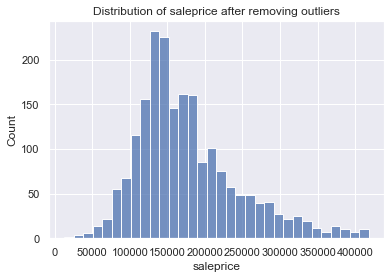

In [22]:
sns.histplot(df_train['saleprice']);
plt.title('Distribution of saleprice after removing outliers');

In [23]:
df_train[['gr_liv_area','garage_size_cond']].describe()

,gr_liv_area,garage_size_cond
count,2018.000000,2018.000000
mean,1481.194747,1395.240833
std,480.513422,648.419140
min,334.000000,0.000000
25%,1125.000000,936.000000
50%,1436.000000,1434.000000
75%,1717.750000,1728.000000
max,5642.000000,5256.000000


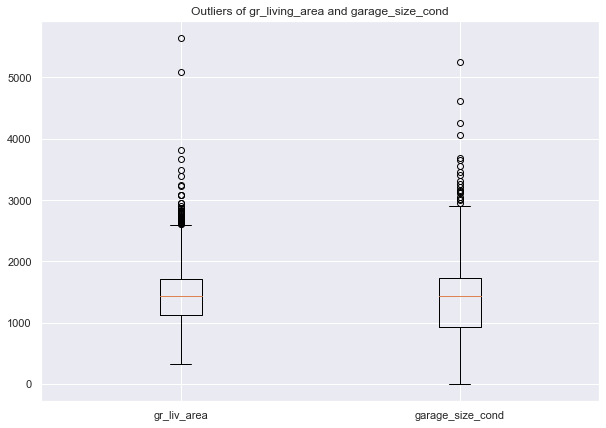

In [24]:
plt.figure(figsize=(10,7))
plt.boxplot(df_train[['gr_liv_area','garage_size_cond']],
            labels = ['gr_liv_area','garage_size_cond'])

plt.title('Outliers of gr_living_area and garage_size_cond');
#As they are one of the top 5 corr values and have skewed data, there seem to be a lot of outliers for both. Will remove them

This are the central tendency for gr_living_area and garage_size_cond which belongs to top 5 corr but are skewed. Seems like gr_liv_area and garage_size_cond have a lot of outliers in the data. 
Following steps to remove the outliers below

In [25]:
#calculate z-scores for each row and input the z_score in new column for gr_liv_area
df_train['zscore'] = (df_train.gr_liv_area - df_train.gr_liv_area.mean() ) / df_train.gr_liv_area.std()

In [26]:
df_train = df_train.loc[(df_train.zscore>-3) & (df_train.zscore<3)] 
df_train

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,misc_val,mo_sold,yr_sold,sale_type,saleprice,property_age,remodel_age,porch_sf,garage_size_cond,zscore
0,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,3,2010,WD,130500,34,5,1,1425.0,-0.004568
1,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,0,4,2009,WD,220000,13,12,1,1677.0,1.333585
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,0,1,2010,WD,109000,57,3,1,738.0,-0.882795
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,0,4,2010,WD,174000,4,3,0,1200.0,-0.077406
4,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,0,3,2010,WD,138500,110,17,1,1452.0,-0.075325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,20,RL,79.0,11449,Pave,None,IR1,HLS,AllPub,Inside,...,0,1,2008,WD,298751,1,1,1,1560.0,0.513628
2047,30,RL,0.0,12342,Pave,None,IR1,Lvl,AllPub,Inside,...,0,3,2009,WD,82500,69,59,0,1617.0,-1.290692
2048,50,RL,57.0,7558,Pave,None,Reg,Bnk,AllPub,Inside,...,0,3,2009,WD,177000,81,59,0,684.0,0.898633
2049,20,RL,80.0,10400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,11,2009,WD,144000,53,53,1,882.0,-0.585196


In [27]:
#repeat the same for garage_size_cond
df_train['zscore'] = (df_train.garage_size_cond - df_train.garage_size_cond.mean() ) / df_train.garage_size_cond.std()

<ipython-input-27-c7ba35f2fc18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['zscore'] = (df_train.garage_size_cond - df_train.garage_size_cond.mean() ) / df_train.garage_size_cond.std()


In [28]:
df_train = df_train.loc[(df_train.zscore>-3) & (df_train.zscore<3)] 

In [29]:
df_train= df_train.drop('zscore',axis=1)
#drop the zscore columns as wont be in use moving forward

In [30]:
df_train.shape

(1997, 71)

After removing the outliers and necessary columns, columns reduce to 71 

In [31]:
df_train.head()

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,...,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,property_age,remodel_age,porch_sf,garage_size_cond
0,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,...,None,0,3,2010,WD,130500,34,5,1,1425.0
1,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,...,None,0,4,2009,WD,220000,13,12,1,1677.0
2,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,1,2010,WD,109000,57,3,1,738.0
3,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,...,None,0,4,2010,WD,174000,4,3,0,1200.0
4,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,...,None,0,3,2010,WD,138500,110,17,1,1452.0


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 2050
Data columns (total 71 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ms_subclass       1997 non-null   int64  
 1   ms_zoning         1997 non-null   object 
 2   lot_frontage      1997 non-null   float64
 3   lot_area          1997 non-null   int64  
 4   street            1997 non-null   object 
 5   alley             1997 non-null   object 
 6   lot_shape         1997 non-null   object 
 7   land_contour      1997 non-null   object 
 8   utilities         1997 non-null   object 
 9   lot_config        1997 non-null   object 
 10  land_slope        1997 non-null   object 
 11  neighborhood      1997 non-null   object 
 12  condition_1       1997 non-null   object 
 13  condition_2       1997 non-null   object 
 14  bldg_type         1997 non-null   object 
 15  house_style       1997 non-null   object 
 16  overall_qual      1997 non-null   int64  


### Model data preparation
--- 

*Creating Dummies for categorical columns and Interactions*

In [33]:
corr_cols = df_train [df_train.columns.sort_values()].corr().nlargest(10, 'saleprice').index
corr_cols
#this is top 10 correlated values to saleprice befor dummies

Index(['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_size_cond', 'total_bsmt_sf', 'bsmt_qual',
       'year_remod_add', 'full_bath'],
      dtype='object')

In [34]:
cat_var = [i for i in df_train.columns if df_train[i].dtype == object ]
cat_var
#creating dummies where type = object

['ms_zoning',
 'street',
 'alley',
 'lot_shape',
 'land_contour',
 'utilities',
 'lot_config',
 'land_slope',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'bsmt_exposure',
 'bsmtfin_type_1',
 'bsmtfin_type_2',
 'heating',
 'electrical',
 'functional',
 'garage_type',
 'garage_finish',
 'fence',
 'misc_feature',
 'sale_type']

In [35]:
#(convert each categorical column into a one-hot encoded matrix). create a copy of df_train 
df_train_copy = df_train.copy()
df_train = pd.get_dummies(df_train, columns=cat_var, drop_first=True)

In [36]:
corr_cols = df_train [df_train.columns.sort_values()].corr().nlargest(10, 'saleprice').index
corr_cols
#not much difference of changes in top 10 corr except that foundation_PConc replace full_bath

Index(['saleprice', 'overall_qual', 'exter_qual', 'gr_liv_area',
       'kitchen_qual', 'garage_size_cond', 'total_bsmt_sf', 'bsmt_qual',
       'year_remod_add', 'foundation_PConc'],
      dtype='object')

In [37]:
df_train.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_remod_add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,0.0,13517,6,8,2005,289.0,4,3,3,...,0,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,1997,132.0,4,3,4,...,0,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,2007,0.0,3,4,3,...,0,0,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,2007,0.0,3,3,4,...,0,0,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,1993,0.0,3,3,2,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df_train.shape

(1997, 218)

### Modelling
---

In [39]:
def rmse(ytest, ypred):
    return np.sqrt(mean_squared_error(ytest, ypred))

In [40]:
# for each column, load in only if it is numeric and not saleprice
features = [col for col in df_train._get_numeric_data().columns if col != 'saleprice']
X = df_train[features]
y = df_train['saleprice']
X.head()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_remod_add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,...,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,0.0,13517,6,8,2005,289.0,4,3,3,...,0,0,0,0,0,0,0,0,0,1
1,60,43.0,11492,7,5,1997,132.0,4,3,4,...,0,0,0,0,0,0,0,0,0,1
2,20,68.0,7922,5,7,2007,0.0,3,4,3,...,0,0,0,0,0,0,0,0,0,1
3,60,73.0,9802,5,5,2007,0.0,3,3,4,...,0,0,0,0,0,0,0,0,0,1
4,50,82.0,14235,6,8,1993,0.0,3,3,2,...,0,0,0,0,0,0,0,0,0,1


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

*Standardizing the data as the values are not normally distributed*

In [42]:
ss = StandardScaler()
#get the mean and std for training data
X_train = ss.fit_transform(X_train)
#using mean and std of training data for transforming the data for test set
X_test = ss.transform(X_test)

In [43]:
X_train.shape

(1497, 217)

In [44]:
#null model y mean
y_mean = np.mean(y)
print('Null model mean: ', y_mean)

Null model mean:  175498.56935403106


In [45]:
null_mse = np.mean((y- y_mean)**2)
print('Null model MSE:',null_mse)

Null model MSE: 4621456973.9026785


***Linear Modelling***

In [46]:
lr = LinearRegression()

In [47]:
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred = lr.predict(X_train)

In [49]:
print(lr.intercept_)

174530.48100266285


In [50]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores_mean= lr_scores.mean()
lr_scores
print('Linear Cross Value Score: ',lr_scores_mean)

Linear Cross Value Score:  -3.883643965823163e+25


In [51]:
print('Linear Train Rsquare score: ',lr.score(X_train, y_train))

Linear Train Rsquare score:  0.94244369409028


In [52]:
print('Linear Test Rsquare score: ',lr.score(X_test, y_test))

Linear Test Rsquare score:  -8.391428631363929e+21


In [53]:
#metrics.r2_score(y_test, y_pred)
#np.sqrt(mean_squared_error(y_train, y_pred))
print('Linear RMSE: ',rmse(y_train, y_pred))

Linear RMSE:  16187.615460451041


***Lasso Modelling***

In [54]:
lasso = LassoCV(n_alphas=500)

In [55]:
lasso.fit(X_train, y_train)

LassoCV(n_alphas=500)

In [56]:
lasso_pred = lasso.predict(X_test)

In [57]:
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=5)
print('Lasso Cross Value Score :',lasso_scores.mean())

Lasso Cross Value Score : 0.9174773879664679


In [58]:
print('Lasso Train RSquare score :',lasso.score(X_train, y_train)) 

Lasso Train RSquare score : 0.9360770915869945


In [59]:
print('Lasso Test RSquare score :',lasso.score(X_test, y_test))

Lasso Test RSquare score : 0.9103751601856599


In [60]:
# RMSE
print('Lasso RMSE: ',rmse(y_test, lasso_pred))

Lasso RMSE:  20787.27471934066


***Ridge Modelling***

In [61]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [62]:
ridge.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [63]:
ridge_pred = ridge.predict(X_test)

In [64]:
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=5)
print('Ridge Cross Val Mean: ',ridge_scores.mean())

Ridge Cross Val Mean:  0.9132923479352468


In [65]:
print('Ridge Train Rsquare score: ', ridge.score(X_train, y_train))

Ridge Train Rsquare score:  0.9420218028028646


In [66]:
print('Ridge Test Rsquare score: ',ridge.score(X_test, y_test))

Ridge Test Rsquare score:  0.9003757592957762


In [67]:
print('Ridge RMSE: ',rmse(y_test, ridge_pred))

Ridge RMSE:  21916.231114787337


**Overall result and findings**

Null model MSE = 4621456973.902

Saleprice mean = 175498.569


| Evaluation Metrics  | Linear | Lasso   |  Ridge |
|  :----:      |    :----:   |          :----: |  :----: |
| Cross Value Mean  | -3.88 | 0.917  | 0.913 |
| Train R-square   |  0.942    | 0.936  | 0.942|
| Test R-square   | -8.39  |   0.910 |0.900 |
| RMSE   | 16187.615     | 20787.274      | 21916.231 |

From above findings, it looks like linear is a horrible model as the cross value mean score,train r-square and test r-square
is very off with the cv as negative and the r-square is positive. Althought it's RMSE is lowest but the cross value mean and test r square values are too fart apart from it's too good to be true r-square at 94%

Lasso and ridge scores are similiar but with Ridge having better R square at 0.94 and Lasso having better RMSE score at 2078.274. The differencen of lasso between test,train and model scores are also closer in values than ridge.  

In [68]:
lasso_predict =  y_test  - lasso_pred 

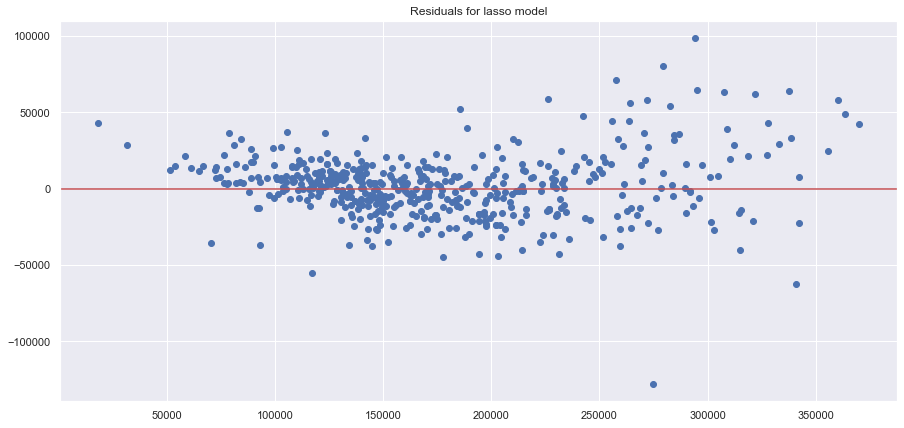

In [69]:
plt.figure(figsize=(15, 7))
plt.scatter(lasso_pred, lasso_predict);
plt.axhline(0, color='r');
plt.title('Residuals for lasso model');

In [70]:
ridge_predict =  y_test  - ridge_pred 

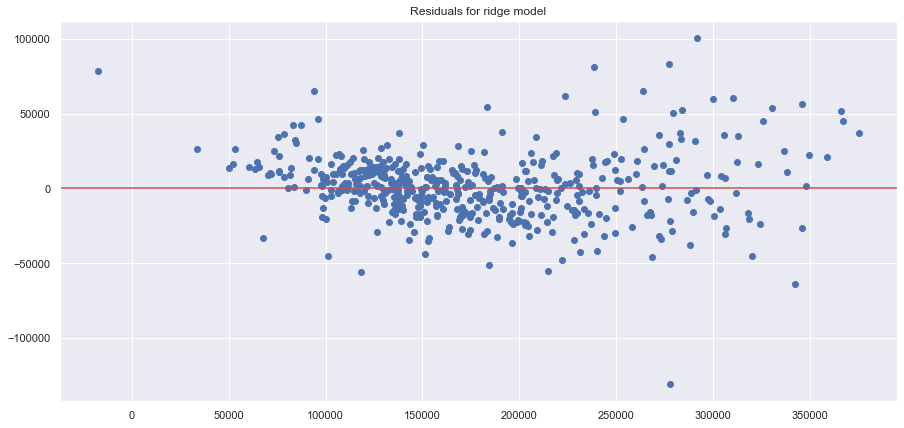

In [71]:
plt.figure(figsize=(15, 7))
plt.scatter(ridge_pred, ridge_predict);
plt.axhline(0, color='r');
plt.title('Residuals for ridge model');

Comparing the residuals, lasso seems to have more points clustered near 0. With more points are close to 0 and lower RMSE, I have selected lasso as my best fit model.

## Fit Model 
---
Based on the observations above, I have decided to use lasso be as my best fit model

In [72]:
lasso_best = LassoCV(n_alphas=500)
lasso_best.fit(X_test,y_test)

LassoCV(n_alphas=500)

In [92]:
lasso_pred = lasso_best.predict(X_test)

In [74]:
best_lasso_score = cross_val_score(lasso_best,X_test,y_test, cv =5)
print('Lasso CV Mean score for fit model(lasso): ',best_lasso_score.mean())

Lasso CV Mean score for fit model(lasso):  0.877765515173256


In [75]:
print('Lasso R2 score for fit model(lasso): ',lasso_best.score(X_test, y_test))

Lasso R2 score for fit model(lasso):  0.9237558298791271


In [76]:
print('RMSE for fit model(lasso):',rmse(y_test,lasso_pred))

RMSE for fit model(lasso): 19172.8502510522


In [77]:
# plot residuals
resid_best =  y_test  - lasso_pred

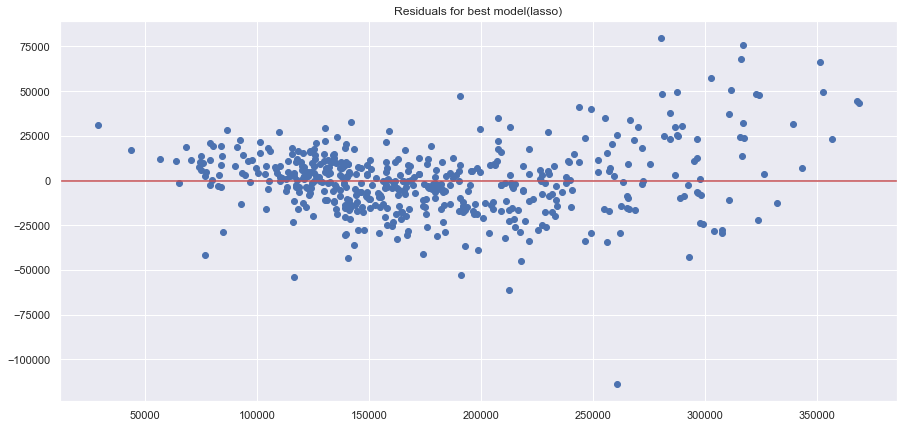

In [78]:
plt.figure(figsize=(15, 7))
plt.scatter( lasso_pred, resid_best);
plt.axhline(0, color='r');
plt.title('Residuals for best model(lasso)');

In [79]:
lasso_coef_series= pd.Series(lasso_best.coef_, index=features).sort_values(ascending=False)
lasso_coef_series[lasso_coef_series != 0]
# there are 66 features that are not 0 and use in the model

gr_liv_area         21361.470040
overall_qual        13272.020123
bsmtfin_sf_1         8976.718673
total_bsmt_sf        6696.062324
exter_qual           6355.892199
                        ...     
remodel_age         -1545.949217
lot_shape_Reg       -1585.894858
condition_1_RRAe    -2281.280190
property_age        -2517.595242
ms_subclass         -3131.076046
Length: 66, dtype: float64

In [80]:
lasso_coef_series[lasso_coef_series != 0]

gr_liv_area         21361.470040
overall_qual        13272.020123
bsmtfin_sf_1         8976.718673
total_bsmt_sf        6696.062324
exter_qual           6355.892199
                        ...     
remodel_age         -1545.949217
lot_shape_Reg       -1585.894858
condition_1_RRAe    -2281.280190
property_age        -2517.595242
ms_subclass         -3131.076046
Length: 66, dtype: float64

In [81]:
lasso_coef_pos=lasso_coef_series[lasso_coef_series != 0].head(10).sort_values(ascending=False)
lasso_coef_pos
#top ten of coefficient that impact saleprice

gr_liv_area             21361.470040
overall_qual            13272.020123
bsmtfin_sf_1             8976.718673
total_bsmt_sf            6696.062324
exter_qual               6355.892199
neighborhood_NridgHt     5644.358277
kitchen_qual             4046.454513
garage_size_cond         3676.782760
neighborhood_NoRidge     3535.914073
neighborhood_Crawfor     3168.861784
dtype: float64

In [82]:
lasso_coef_neg = lasso_coef_series[lasso_coef_series != 0].tail(10).sort_values(ascending=True)
lasso_coef_neg 
#last ten of negative coefficient that may greatly impact saleprice

ms_subclass            -3131.076046
property_age           -2517.595242
condition_1_RRAe       -2281.280190
lot_shape_Reg          -1585.894858
remodel_age            -1545.949217
bsmt_exposure_No       -1115.774606
foundation_CBlock       -907.031401
exterior_1st_Wd Sdng    -781.247478
neighborhood_MeadowV    -748.248437
garage_type_Detchd      -660.626351
dtype: float64

In [83]:
total_coef= pd.Series()
total_coef = total_coef.append(lasso_coef_neg[:5])
total_coef = total_coef.append(lasso_coef_pos[:5])

<ipython-input-83-4d6125d215b5>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  total_coef= pd.Series()


In [84]:
total_coef

ms_subclass         -3131.076046
property_age        -2517.595242
condition_1_RRAe    -2281.280190
lot_shape_Reg       -1585.894858
remodel_age         -1545.949217
gr_liv_area         21361.470040
overall_qual        13272.020123
bsmtfin_sf_1         8976.718673
total_bsmt_sf        6696.062324
exter_qual           6355.892199
dtype: float64

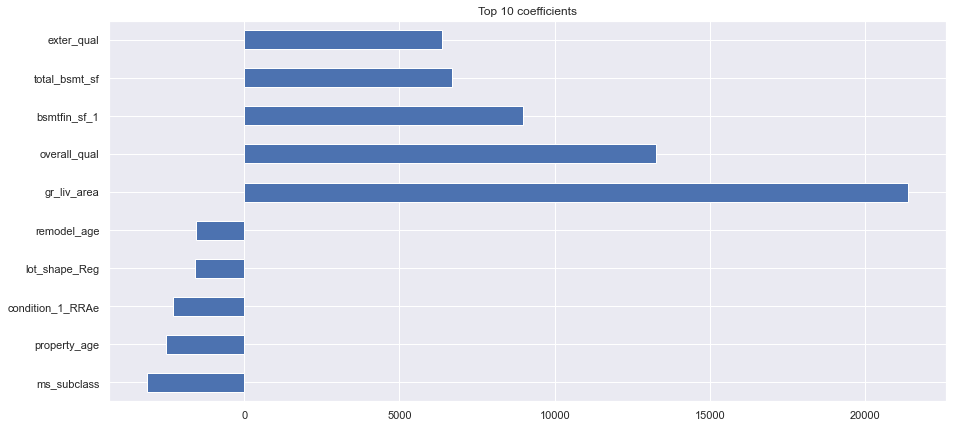

In [85]:
plt.title('Top 10 coefficients')
total_coef.plot.barh(figsize=(15, 7))
plt.xticks();

This image shows that ground living area,overall quality positively heavily influence the price where as ms_subclass and property_age could do so negatively

In [86]:
# checking sample size for categorical coefficients in the original train df
print(df_train_copy.neighborhood.value_counts())
print(df_train_copy.bldg_type.value_counts())
print(df_train_copy.exterior_1st.value_counts())
print(df_train_copy.ms_subclass.value_counts())

NAmes      310
CollgCr    177
OldTown    161
Edwards    139
Somerst    128
Gilbert    116
Sawyer     111
NridgHt    104
SawyerW     86
NWAmes      86
Mitchel     81
BrkSide     75
Crawfor     71
IDOTRR      68
Timber      47
NoRidge     43
SWISU       30
StoneBr     28
ClearCr     26
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     16
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64
1Fam      1648
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      44
Name: bldg_type, dtype: int64
VinylSd    696
MetalSd    327
HdBoard    300
Wd Sdng    272
Plywood    149
CemntBd     78
BrkFace     62
WdShing     45
AsbShng     33
Stucco      26
BrkComm      3
Stone        2
CBlock       2
ImStucc      1
AsphShn      1
Name: exterior_1st, dtype: int64
20     747
60     373
50     196
120    132
30      99
70      90
160     88
80      86
90      75
190     44
85      28
75      12
45      11
180     11
40       4
150      1
Name: ms

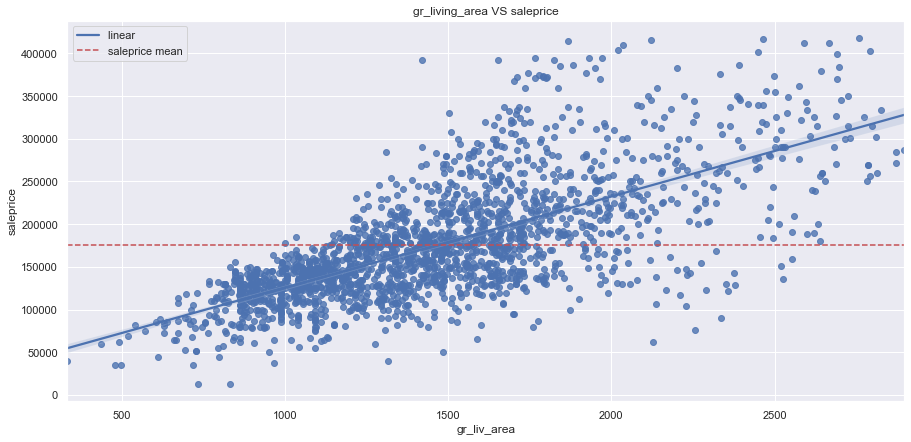

In [87]:
plt.figure(figsize=(15, 7))
sns.regplot(x=X['gr_liv_area'], y=y, data=X)
plt.axhline(y_mean, color = 'r' , linestyle = 'dashed')  
plt.legend(["linear ", "saleprice mean"]);
plt.title('gr_living_area VS saleprice');

This shows that as as bigger the living area, the higher the saleprice with positive linear relation. Living area after 2000ft
shows to be more disperse in values that shows there are more variation in prices after that area

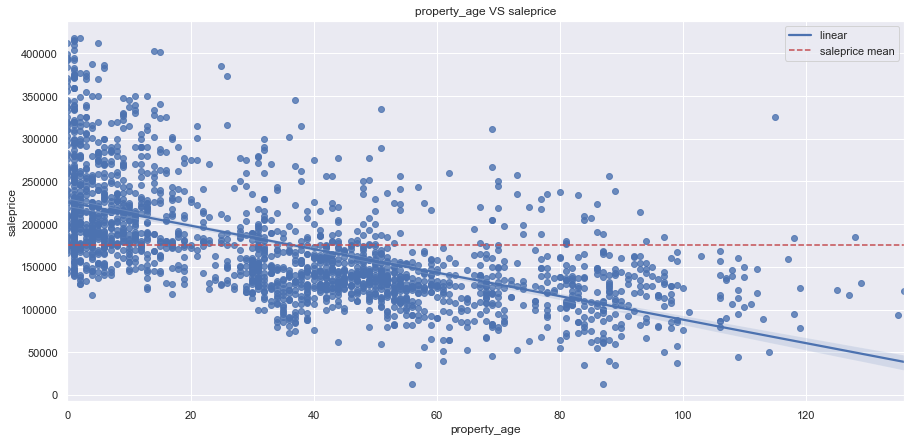

In [88]:
plt.figure(figsize=(15, 7))
sns.regplot(x=X['property_age'], y=y, data=X)
plt.axhline(y_mean, color = 'r' , linestyle = 'dashed')  
plt.title('property_age VS saleprice')
plt.legend(["linear ", "saleprice mean"]);


This shows that as property age gets older, the price drops significantly. Property age less than 20 seems to be able to sell
at a much higher price. Especially for property age above 60, more prices are lesser than the mean and regression line thus
this shows property that age more than that will have much lesser selling price

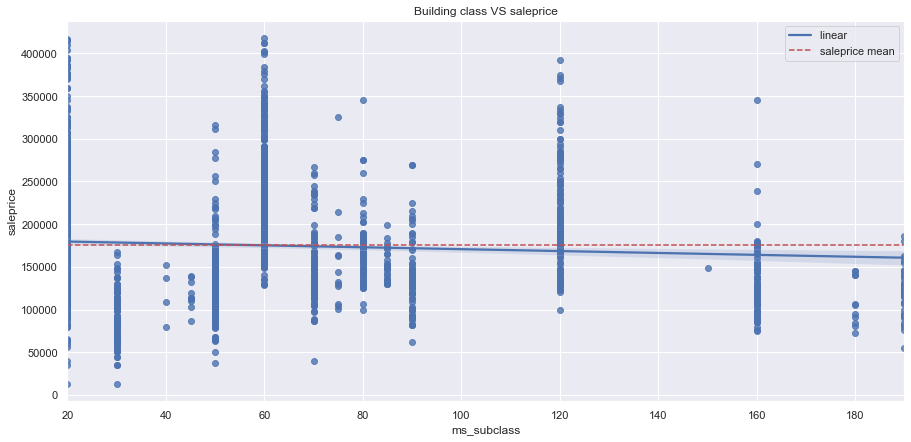

In [89]:
plt.figure(figsize=(15, 7))
sns.regplot(x=X['ms_subclass'], y=y, data=X)
plt.axhline(y_mean, color = 'r' , linestyle = 'dashed')  
plt.title('Building class VS saleprice')
plt.legend(["linear ", "saleprice mean"]);


### Conclusion

| Lasso|CV | R2 | MSE  Ridge | 
|  :----:      |    :----:   |          :----: |    :----: | 
| Train | 0.917 | 0.936  |    0.942 | 
| Fit model   |  0.878   | 0.923  |  19172.85 | 



|Features | Coefficients|
|  :----:      |    :----:   |  
|ms_subclass  |       -3131.076046 |
|property_age |       -2517.595242 |
|condition_1_RRAe|   -2281.280190 |
|lot_shape_Reg  |   -1585.894858|
|remodel_age     |     -1545.949217|
|gr_liv_area     |     21361.470040|
|overall_qual      |   13272.020123|
|bsmtfin_sf_1      |    8976.718673|
|total_bsmt_sf     |    6696.062324|
|exter_qual       |     6355.892199|

Lasso regression model had the best predictive performance on housing sale price in Ames USA, and outperformed the other linear models tested. As a regularised regression method, it was able to reveal which features affect sale price the most.I am confident my model will predict prices with this insights.

Ground living area square feet, overall quality and basement size are the top three feature that can highly influence the saleprice positively. However, property age and building class can heavily affect the price negatively too. Thus the assumption of older property age sells more is false.

To have a better selling price, homeowners should look at the following based on the results above:
1. Improve overall material and finish quality by repainting and renovating parts of the house to have a new updated look
2. Increase their ground living area as a condideration for renovation works
3. Adding or expanding basement size while improving their quality as well

Property agents can advise accordingly to homeowners on the features they could work on to their house for better selling price to get better profits especially if they have a very big property age with still at its original state. 

However, the model was developed using data on houses sold between 2006 - 2010 in Ames, USA. To improve the applicability of the model, one can consider adding in more data from a wider time frame and also other locations to also predict houseprices in other states.

In [91]:
submit_df = pd.DataFrame()
submit_df['SalePrice'] = lasso_pred 

submit_df.to_csv('data/lasso_predict.csv', index=False)